In [ ]:
# Reads in Fe/H retrievals based on the full and 1-to-100 degraded posterior

# Created 2023 Oct. 4

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
stem = '/Users/bandari/Documents/git.repos/rrlfe/notebooks_for_development/data/'

In [5]:
df_full = pd.read_csv(stem + 'full_posterior_mcd_test.csv')
df_deg = pd.read_csv(stem + 'deg_1-100_mcd_test.csv')

In [11]:
df_combo = df_full.merge(df_deg, on='realization_spec_file_name', suffixes=('_full','_deg'))

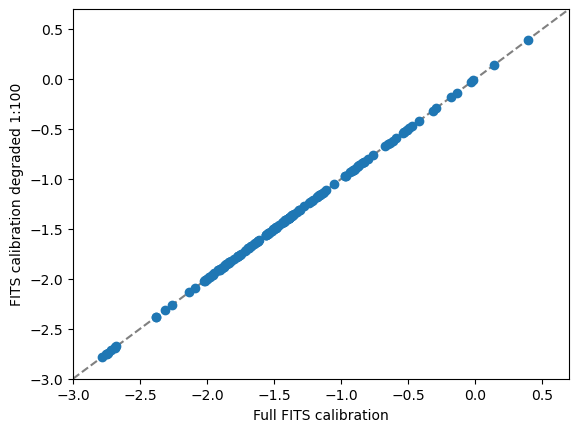

In [20]:
plt.scatter(df_combo['feh_corrected_full'],df_combo['feh_corrected_deg'])
plt.xlabel('Full FITS calibration')
plt.ylabel('FITS calibration degraded 1:100')
plt.plot([-3.,1.0],[-3.,1.0], linestyle='--', color='gray', zorder=0)
plt.xlim([-3.0,0.7])
plt.ylim([-3.0,0.7])
plt.show()

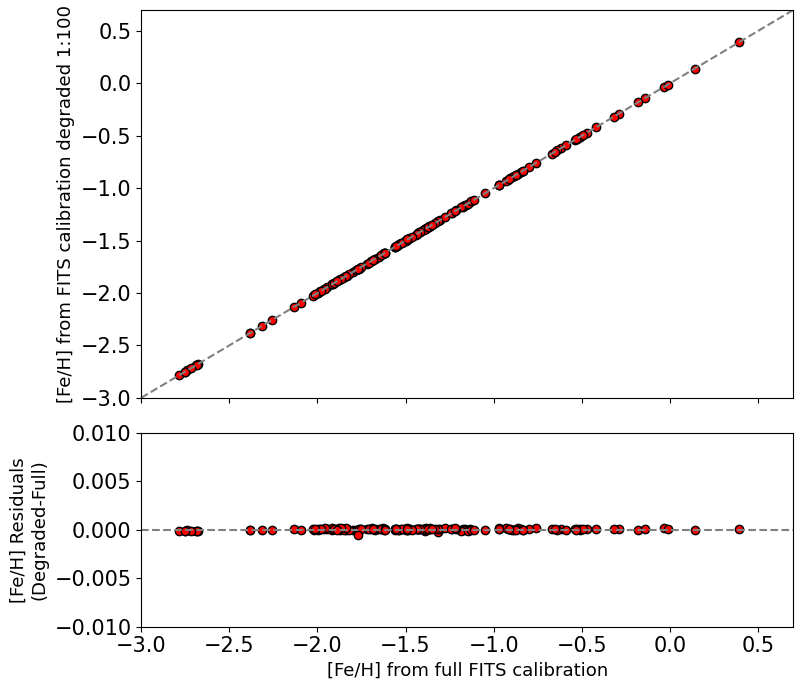

In [35]:
fig, (a0, a1) = plt.subplots(nrows=2, ncols=1, gridspec_kw={'height_ratios': [1, 0.5]}, sharex=True, figsize=(8,7))

a0.scatter(df_combo['feh_corrected_full'],df_combo['feh_corrected_deg'],color='red',edgecolor='k')
a0.plot([-3.,1.0],[-3.,1.0], linestyle='--', color='gray')
a0.set_xlim([-3.0,0.7])
a0.set_ylim([-3.0,0.7])

a1.plot([-3.,1.0],[0.,0.], linestyle='--', color='gray')
a1.scatter(df_combo['feh_corrected_full'],df_combo['feh_corrected_deg']-df_combo['feh_corrected_full'],color='red',edgecolor='k')

#a1.set_yticks(np.arange(-0.01,0.01,0.02))
a0.set_ylim([-3.0,0.7])
a1.set_ylim([-0.01,0.01])
a0.tick_params(axis='both', which='major', labelsize=15)
a1.tick_params(axis='both', which='both', labelsize=15)

a0.set_ylabel('[Fe/H] from FITS calibration degraded 1:100', fontsize=13)
a1.set_ylabel('[Fe/H] Residuals\n(Degraded-Full)', fontsize=13)
a1.set_xlabel('[Fe/H] from full FITS calibration', fontsize=13)

plt.tight_layout()

file_name = 'junk.pdf'
plt.savefig(file_name)

#plt.show()